In [122]:
import netCDF4 as nc
import numpy as np
import xarray as xr
from salishsea_tools import nc_tools, viz_tools, grid_tools, geo_tools
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
data = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')

In [61]:
data['time'].values[:5]

array(['2014-09-12T00:00:00.000000000', '2014-09-12T01:00:00.000000000',
       '2014-09-12T02:00:00.000000000', '2014-09-12T03:00:00.000000000',
       '2014-09-12T04:00:00.000000000'], dtype='datetime64[ns]')

In [17]:
nc_tools.show_variables(data)

odict_keys(['time', 'gridY', 'gridX', 'atmpres', 'precip', 'qair', 'solar', 'tair', 'therm_rad', 'u_wind', 'v_wind'])


In [71]:
grid = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaAtmosphereGridV1')

In [77]:
grid_NEMO = xr.open_dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
grid_NEMO2 = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

In [78]:
mask = grid_NEMO2.variables['Bathymetry'][:].mask

In [79]:
grid_tools.build_GEM_mask(grid, grid_NEMO, mask)

KeyError: 'x'

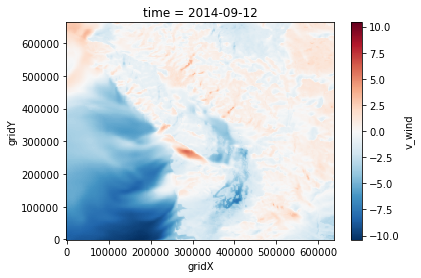

In [85]:
data.v_wind.isel(time=0).plot()

In [18]:
Jan04 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/LakeJan0.4/SalishSea_1h_20170101_20170107_grid_T.nc')

In [19]:
mesh_mask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone2.nc')
new_domain = mesh_mask.variables['tmask'][0,:,334:898,114:398]   

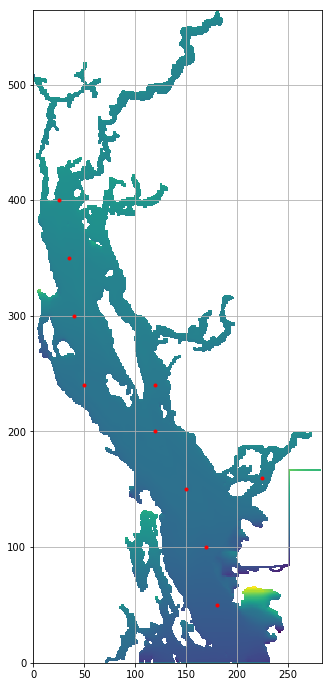

In [92]:
fig, ax = plt.subplots(1,1, figsize=(18,12))
ax.pcolormesh(np.ma.masked_array(Jan04.variables['sossheig'][0,:,:], mask = 1-new_domain[0,:,:]))
viz_tools.set_aspect(ax)
ax.plot(25,400,'r.')
ax.plot(35, 350, 'r.')
ax.plot(40, 300, 'r.')
ax.plot(120, 240, 'r.') #funny passage
ax.plot(50, 240, 'r.')
ax.plot(120, 200, 'r.')
ax.plot(150, 150, 'r.')
ax.plot(170, 100, 'r.')
ax.plot(180, 50, 'r.')
ax.plot(225, 160, 'r.')   #Howe
ax.grid('on')

In [2]:
test = nc.Dataset('/home/vdo/MEOPAR/SalishSea/with_new_vars2/SalishSea_1h_20170101_20170101_grid_T.nc')

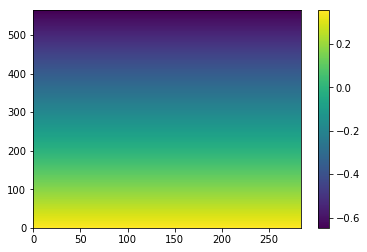

In [9]:
plt.pcolormesh(test.variables['vtau'][0,...])
plt.colorbar()

In [10]:
4633/12961

0.3574569863436463

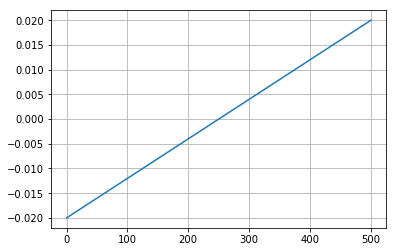

In [56]:
y_vtau = 500
njmpp=1
y0v=250
rn_vtau = 0.02
jj = np.linspace(0,500,2)
y = rn_vtau  /(y_vtau+njmpp-1-y0v)* ( jj+njmpp-1 - y0v ) 
plt.plot(jj,y)
plt.grid('on')

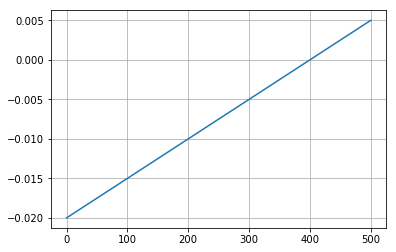

In [67]:
y_vtau = 500
njmpp=1
y0v=400
rn_vtau = 0.02
jj = np.linspace(0,500,2)
y = rn_vtau  *( jj+njmpp-1 - y0v )  /(y_vtau+njmpp-1-y0v) *(-y0vnjmpp-1+y_vtau)/(y0v)
plt.plot(jj,y)
plt.grid('on')

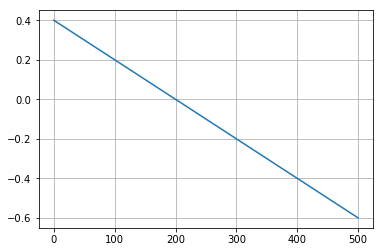

In [72]:
y0 = 200
y_vtau = 0
rn_vtau = 0.4
m = rn_vtau/(x_vtau - x0)
b = -m*x0
jj = np.linspace(0,500,2)
y = m*(jj+njmpp-1) + b
plt.plot(jj,y)
plt.grid('on')

In [76]:
test = nc.Dataset('/home/vdo/MEOPAR/SalishSea/test/SalishSea_1h_20160601_20160601_grid_V.nc')

In [77]:
test.variables['vtau']

<class 'netCDF4._netCDF4.Variable'>
float32 vtau(time_counter, y, x)
    standard_name: surface_downward_y_stress
    long_name: Wind Stress along j-axis
    units: N/m2
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 h
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (6, 564, 284)
filling on

In [123]:
test2 = nc.Dataset('/home/vdo/MEOPAR/SalishSea/test/SalishSea_1h_20160601_20160601_grid_V.nc')

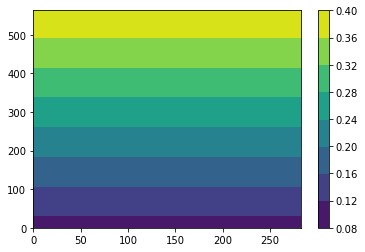

In [130]:
plt.contourf(test2.variables['vtau'][2,...])
plt.colorbar()

In [124]:
test2.variables['vtau']

<class 'netCDF4._netCDF4.Variable'>
float32 vtau(time_counter, y, x)
    standard_name: surface_downward_y_stress
    long_name: Wind Stress along j-axis
    units: N/m2
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 h
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (5, 564, 284)
filling on